<a href="https://colab.research.google.com/github/Adolfo-AB/learning-machine-learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model
Implementing a Linear Regression model with Gradient Descent.

In [221]:
import numpy as np
import matplotlib.pyplot as plt


In [227]:
SIZE_TRAINING_DATA = 100

# Set the seed for reproducibility
np.random.seed(42)

# Generate 100 random values between 1000 and 3500 for x_train
x_train = np.linspace(1000, 3500, SIZE_TRAINING_DATA) + np.random.randn(SIZE_TRAINING_DATA) * 100

# Generate 100 random values between 50000 and 150000 for y_train
y_train = np.linspace(50000, 150000, SIZE_TRAINING_DATA) + np.random.randn(SIZE_TRAINING_DATA) * 2000

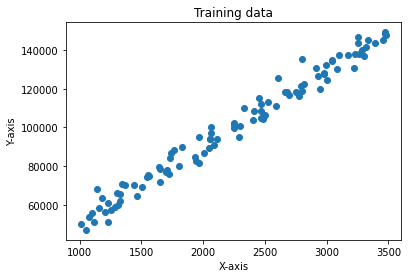

In [228]:
# Create a new figure
plt.figure()

# Plot the vectors
plt.scatter(x_train, y_train)

# Add a title and axis labels
plt.title('Training data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

In [229]:
def mean_squared_error(y_true, y_predicted):
  return np.mean(y_true-y_predicted)**2

def gradient_descent(x, y, intercept, slope, learning_rate, num_iterations):
  for i in range(num_iterations):
    y_predicted = slope*x + intercept
    error = y - y_predicted
    intercept -= learning_rate*(-2*np.mean(error))
    slope -= learning_rate*(-2*np.mean(error*x))

    #if i % 100 == 0:
    #        print(f"Iteration: {i}, MSE: {mean_squared_error(y, y_predicted)}, Intercept: {intercept}, Slope: {slope}")

  return intercept, slope

In [230]:
# Standardize the input data
x_train_scaled = (x_train - np.mean(x_train)) / np.std(x_train)
y_train_scaled = (y_train - np.mean(y_train)) / np.std(y_train)

# Call the gradient descent function with the scaled data
intercept, slope = gradient_descent(x_train_scaled, y_train_scaled, 0, 0, 0.01, 1000)

# Scale the x_model data using the same mean and standard deviation as x_train
x_model = np.linspace(0,3500,100)
x_model_scaled = (x_model - np.mean(x_train)) / np.std(x_train)

# Calculate the predicted values using the scaled data and then rescale them
y_model_scaled = slope * x_model_scaled + intercept
y_model = y_model_scaled * np.std(y_train) + np.mean(y_train)

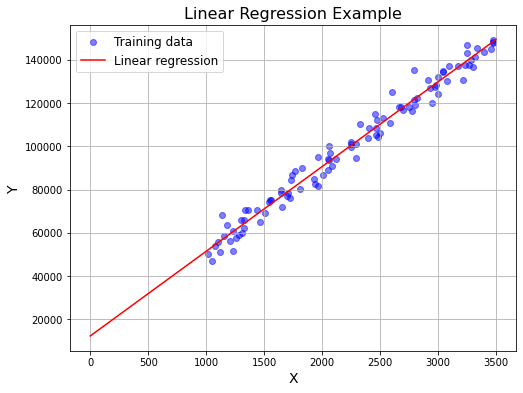

In [231]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(x_train, y_train, color='b', alpha=0.5, label='Training data')

# Plot the regression line
plt.plot(x_model, y_model, color='r', label='Linear regression')

# Add a title and axis labels
plt.title('Linear Regression Example', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Add a grid
plt.grid(True)

# Show the plot
plt.show()